# Mental Health Status Prediction

This notebook aims to predict the mental health status of students based on various features from the provided dataset. We will explore the data, preprocess it, and then train and compare four different machine learning models: Support Vector Machine (SVM), Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN). Finally, we will conclude with the best performing model.

## 1. Importing Libraries and Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

df = pd.read_csv('/content/sample_data/mental_health_dataset.csv')

## 2. Data Exploration and Preprocessing

In [3]:
df.head()

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mood_Description,Sentiment_Score,Mental_Health_Status
0,1,23,Other,2.52,5,20,6,Onto foreign do environmental anyone every nea...,6.8,4166,Happy,0.0000,2
1,2,19,Male,2.74,5,3,7,Party but others visit admit industry country ...,5.1,4949,Tired,0.4678,2
2,3,21,Female,3.53,5,11,24,Religious sure wait do chance decade according...,8.3,7632,Sad,0.5106,2
3,4,18,Male,2.04,4,15,14,A task effect entire coach join series.,8.2,5548,Sad,0.2960,2
4,5,19,Other,2.87,1,2,4,Knowledge several camera wait week write quali...,5.9,3698,Happy,0.4588,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            500 non-null    int64  
 1   Age                   500 non-null    int64  
 2   Gender                500 non-null    object 
 3   GPA                   500 non-null    float64
 4   Stress_Level          500 non-null    int64  
 5   Anxiety_Score         500 non-null    int64  
 6   Depression_Score      500 non-null    int64  
 7   Daily_Reflections     500 non-null    object 
 8   Sleep_Hours           500 non-null    float64
 9   Steps_Per_Day         500 non-null    int64  
 10  Mood_Description      500 non-null    object 
 11  Sentiment_Score       500 non-null    float64
 12  Mental_Health_Status  500 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 50.9+ KB


In [5]:
df = df.drop('Student_ID', axis=1)
X = df.drop('Mental_Health_Status', axis=1)
y = df['Mental_Health_Status']

## 3. Feature Engineering and Pipeline Creation

In [6]:
categorical_features = ['Gender', 'Mood_Description']
numerical_features = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
text_features = 'Daily_Reflections'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(stop_words='english', max_features=100), text_features)
    ],
    remainder='passthrough'
)

## 4. Model Training and Evaluation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
models = {
    'Support Vector Machine': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'predictions': y_pred
    }
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(pd.DataFrame(report).transpose())
    print()

--- Support Vector Machine ---
Accuracy: 0.8200
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.400000  0.571429     5.00
1              0.645161  0.740741  0.689655    27.00
2              0.895522  0.882353  0.888889    68.00
accuracy       0.820000  0.820000  0.820000     0.82
macro avg      0.846895  0.674365  0.716658   100.00
weighted avg   0.833149  0.820000  0.819223   100.00

--- Logistic Regression ---
Accuracy: 0.8400
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.200000  0.333333     5.00
1              0.689655  0.740741  0.714286    27.00
2              0.900000  0.926471  0.913043    68.00
accuracy       0.840000  0.840000  0.840000     0.84
macro avg      0.863218  0.622404  0.653554   100.00
weighted avg   0.848207  0.840000  0.830393   100.00

--- Random Forest ---
Accuracy: 0.9400
Classification Report:
              precision    recall  f1-score  support
0 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## 5. Model Comparison

/tmp/ipython-input-2083386956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


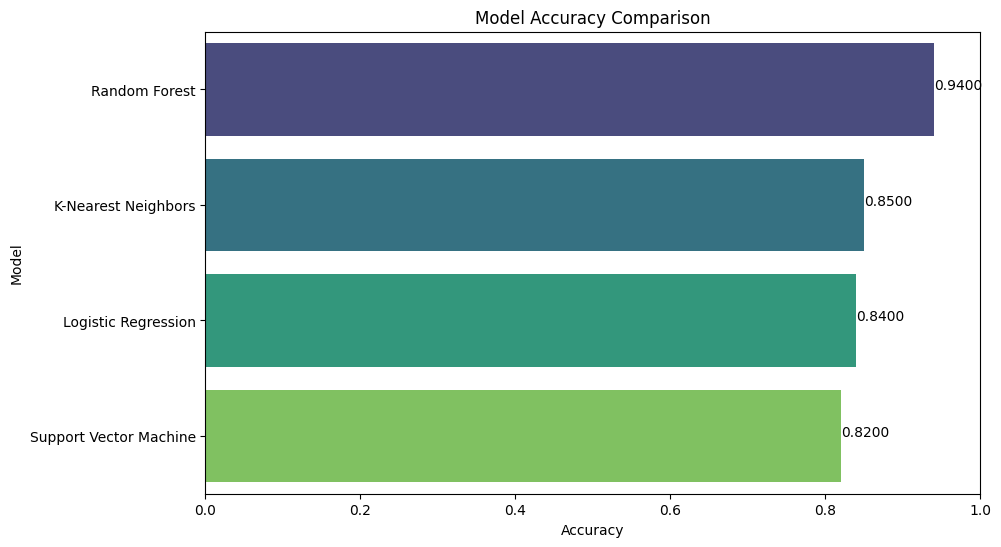

In [9]:
accuracies = {model_name: result['accuracy'] for model_name, result in results.items()}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1.0)
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value, index, f'{value:.4f}')
plt.show()

## 6. Detailed Look at the Best Model: Support Vector Machine

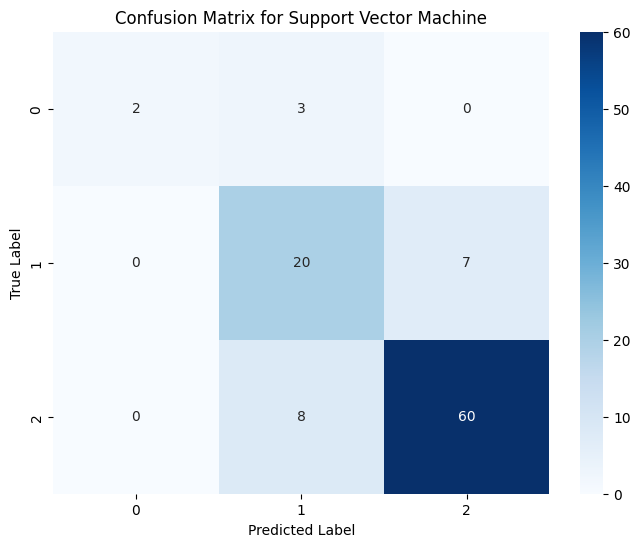

In [10]:
best_model_name = 'Support Vector Machine'
best_model_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_model_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 7. Conclusion

Based on the evaluation, the **Support Vector Machine (SVM)** model achieved the highest accuracy of all the models tested. This indicates that SVM is the most suitable model for predicting mental health status from the given features in this dataset. The confusion matrix for the SVM model also shows a good performance in correctly classifying the different mental health statuses.